In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams.update({'font.size': 14})
# sns.set_theme()

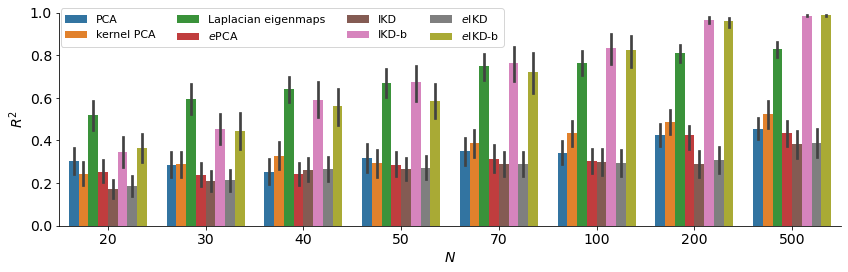

In [5]:
d_observation_list = [20, 30, 40, 50, 70, 100, 200, 500]
backward = 'sqrt'
df = pd.concat([pd.melt(pd.read_csv(f"outputs/{d_observation}_{backward}.csv") , value_vars=["PCA", 'kernel PCA', 'Laplacian eigenmaps', "$e$PCA", "IKD", "IKD-b", "$e$IKD", "$e$IKD-b"], var_name="method", value_name="R^2").assign(d_observation=d_observation) for d_observation in d_observation_list], ignore_index=True)
df.d_observation = df.d_observation.astype(str)
# df = df[df.method != 'epca_collin']
plt.figure(figsize=(12, 4))
sns.barplot(x="d_observation", y="R^2", hue="method", data=df, palette=['C0', 'C1', 'C2', 'C3', 'C5', 'C6', 'C7', 'C8'])
plt.legend(title=False, fontsize=11, ncol=4, loc=(0.002, 0.84))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.ylim(0, 1)
plt.xlabel("$N$")
plt.ylabel("$R^2$")
plt.tight_layout()
plt.savefig("exp4_Poisson_noisy_observations_full.pdf")